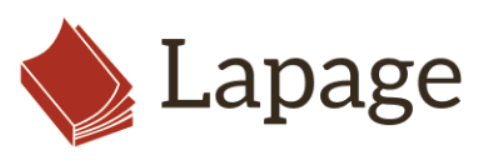

In [34]:
from IPython.display import Image
Image(filename="C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Logo.png")

# Sommaire :

**Partie 1 :** <a href="#A1">Lecture des données</a>

- <a href="#B1">Importation des modules</a>
- <a href="#B2">Importation des fichiers .csv</a>
- <a href="#B3">Aperçu des dataframes</a>

**Partie 2 :** <a href="#A2">Nettoyage des données</a>
- <a href="#B4">Détection des valeurs incohérentes</a>
- <a href="#B5">Création d'un dataframe regroupant les références</a>
- <a href="#B6">Création d'un dataframe séparant les variables de dates</a>
- <a href="#B7">Ajout colonne Âge dans dataframe Customers</a>

**Partie 3 :** <a href="#A3">Export des données</a>

# <a name ="A1">*Partie 1 :* Lecture des données</a>

## <a name="B1">Importation des modules</a>

In [35]:
import pandas as pd
import numpy as np
from math import *
import math

## <a name="B2">Importation des fichiers .csv</a>

In [36]:
customers = pd.read_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Données brutes/customers.csv")
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [37]:
products = pd.read_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Données brutes/products.csv")
products

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [38]:
transactions = pd.read_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Données brutes/transactions.csv")
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


## <a name="B3">Aperçu des dataframes</a>

In [39]:
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [41]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [42]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


# <a name ="A2">*Partie 2 :* Nettoyage des données</a>

## <a name="B4">Détection valeurs incohérentes</a>

### Prix de vente unitaire

Nous allons vérifier si tous les prix de vente des produits sont positifs.

In [43]:
products[products['price']<0]

,id_prod,price,categ
731,T_0,-1.0,0


Un produit, à la référence **T_0** a un prix de vente de -1€, nous allons regarder plus en détail les transactions correspondantes pour tenter d'expliquer cela.

In [44]:
transactions[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Les données en question semblent correspondre à un produit test, en atteste le format de la date, nous allons donc pouvoir supprimer cette référence afin de ne conserver que les véritables produits.

In [45]:
#Suppression des valeurs tests
transactions = transactions.drop(transactions.loc[transactions['id_prod']=='T_0'].index)
products = products.drop(products.loc[products['id_prod']=='T_0'].index)

## <a name="B5">Création d'un dataframe regroupant les références</a>

In [46]:
#Regroupement des ventes par référence
ca_transactions = transactions['id_prod'].value_counts()
ca_transactions = pd.DataFrame(ca_transactions)
ca_transactions = pd.DataFrame.reset_index(ca_transactions)
ca_transactions = ca_transactions.rename(columns = {'id_prod': 'ventes', 'index': 'id_prod'})
ca_transactions

,id_prod,ventes
0,1_369,2252
1,1_417,2189
2,1_414,2180
3,1_498,2128
4,1_425,2096
...,...,...
3261,2_23,1
3262,0_1284,1
3263,2_98,1
3264,2_81,1


In [47]:
#Jointure produit & prix
ca_transactions = ca_transactions.merge(products, on="id_prod", how="outer")
ca_transactions

,id_prod,ventes,price,categ
0,1_369,2252.0,23.99,1.0
1,1_417,2189.0,20.99,1.0
2,1_414,2180.0,23.83,1.0
3,1_498,2128.0,23.37,1.0
4,1_425,2096.0,16.99,1.0
...,...,...,...,...
3282,0_1624,NaN,24.50,0.0
3283,2_86,NaN,132.36,2.0
3284,0_299,NaN,22.99,0.0
3285,0_510,NaN,23.66,0.0


### Détection et remplacement valeurs nulles

In [48]:
ca_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   ventes   3266 non-null   float64
 2   price    3286 non-null   float64
 3   categ    3286 non-null   float64
dtypes: float64(3), object(1)
memory usage: 128.4+ KB


Nous voyons qu'il y a une référence dont la valeur prix est nulle, ce qui signifie qu'elle figurait dans le dataframe *transactions* mais pas dans *produits*.

Nous allons rechercher cette référence.

In [49]:
ca_transactions[ca_transactions['price'].isnull()]

,id_prod,ventes,price,categ
856,0_2245,221.0,NaN,NaN


Nous possédons assez peu d'informations sur le produit en question, mais nous pouvons remarquer que le 1er caractère de l'*id_prod* correspond à la catégorie du produit, nous pouvons donc aisément remplacer cette valeur.

Pour le prix, nous pouvons ensuite réaliser une implémentation par la moyenne pour remplacer le prix manquant. Pour être plus précis, nous allons calculer la moyenne des prix des produits de la même catégorie.

In [50]:
#Affectation de la catégorie
ca_transactions["categ"].fillna(ca_transactions['id_prod'].astype(str).str[0], inplace=True)

In [51]:
#Affectation de la moyenne des prix des produits selon leur catégorie
ca_transactions.price.where((~ca_transactions.price.isnull()) & (ca_transactions.categ != '0'),
                     round(ca_transactions['price'][ca_transactions['categ']==0].mean(),2), inplace=True)

ca_transactions.price.where((~ca_transactions.price.isnull()) & (ca_transactions.categ != '1'),
                     round(ca_transactions['price'][ca_transactions['categ']==1].mean(),2), inplace=True)

ca_transactions.price.where((~ca_transactions.price.isnull()) & (ca_transactions.categ != '2'),
                     round(ca_transactions['price'][ca_transactions['categ']==2].mean(),2), inplace=True)

In [52]:
#Vérification remplacement valeurs nulles
ca_transactions.loc[ca_transactions['id_prod']=="0_2245"]

,id_prod,ventes,price,categ
856,0_2245,221.0,11.73,0


In [53]:
#Recherche de la valeur 0_2245 dans la table Products
products.loc[products['id_prod']=="0_2245"]

,id_prod,price,categ


La variable 0_2245 n'est pas présente dans la table *Products*, nous allons donc l'y ajouter ainsi que toutes ses informations.

In [54]:
#Ajout de la variable 0_2245 dans la table Products
products=products.append({'id_prod' : '0_2245' , 'price' : 11.73, 'categ' : '0'} , ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11364\2768692268.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  products=products.append({'id_prod' : '0_2245' , 'price' : 11.73, 'categ' : '0'} , ignore_index=True)


In [55]:
#Vérification de l'ajout de l'enregistrement
products.loc[products['id_prod']=="0_2245"]

,id_prod,price,categ
3286,0_2245,11.73,0


In [56]:
#Remplacement des NaN
ca_transactions['ventes'] = ca_transactions['ventes'].replace(np.nan, 0)
#Création colonne Chiffre d'Affaires
ca_transactions['ca'] = ca_transactions['ventes']*ca_transactions['price']

## <a name="B6">Création d'un dataframe séparant les variables de dates</a>

In [57]:
#Conversion format date en datetime
transactions['date'] = pd.to_datetime(transactions.date, format='%Y-%m-%d %H:%M:%S.%f')

In [58]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [59]:
#Ajout des colonnes variables de temps et d'une colonne trimestre
transactions['Year'] = transactions['date'].dt.year
transactions['Month'] = transactions['date'].dt.month
transactions['Day'] = transactions['date'].dt.day
transactions['Hour'] = transactions['date'].dt.hour
transactions['Minute'] = transactions['date'].dt.minute
transactions['Second'] = transactions['date'].dt.second
#Ajout d'une colonne Trimestre
transactions['Trimester'] = [ceil(mois/3) for mois in transactions["date"].dt.month]
#Ajout d'une colonne quart_mois
transactions['quart_mois'] = [int((jour-1)*4/31)+1 for jour in transactions["date"].dt.day]
#Ajout d'une colonne Jour de la semaine
transactions['Jour'] = transactions['date'].dt.day_name()
transactions['Num_Jour'] = transactions.date.map(lambda dt: dt.weekday())

In [60]:
#Mise en place de 2 caractères pour les colonnes de date/heure
transactions["Month"] = transactions.Month.map("{:02}".format)
transactions["Day"] = transactions.Day.map("{:02}".format)
transactions["Hour"] = transactions.Hour.map("{:02}".format)
transactions["Minute"] = transactions.Minute.map("{:02}".format)
transactions["Second"] = transactions.Second.map("{:02}".format)

In [61]:
#Changement type de variables
transactions = transactions.astype({'Year': str, 'Month': str, 'Day': str, 'Hour': str, 'Minute': str, 'Second': str})

In [62]:
#Ajout d'une colonne Année-Mois
transactions['Date-month'] = transactions['Year'] + "-" + transactions['Month']
#Ajout d'une colonne Année-Mois-Jour
transactions['Date-day'] = transactions['Year'] + "-" + transactions['Month'] + "-" + transactions['Day']

## <a name="B7">Ajout des âges dans le dataframe Customers</a>

### Ajout colonne Âge

In [63]:
customers['age'] = 2022 - customers['birth']
customers

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79
...,...,...,...,...
8618,c_7920,m,1956,66
8619,c_7403,f,1970,52
8620,c_5119,m,1974,48
8621,c_5643,f,1968,54


### Ajout colonne tranche d'âge

In [64]:
conditionlist = [
    (customers['age'] >= 80) ,
    (customers['age'] >= 70) & (customers['age'] <80),
    (customers['age'] >= 60) & (customers['age'] <70),
    (customers['age'] >= 50) & (customers['age'] <60),
    (customers['age'] >= 40) & (customers['age'] <50),
    (customers['age'] >= 30) & (customers['age'] <40),
    (customers['age'] >= 20) & (customers['age'] <30),
    (customers['age'] < 20)
]
choicelist = ['80+', '70-80', '60-70', '50-60', '40-50', '30-40', '20-30', '-20']
customers['tranche'] = np.select(conditionlist, choicelist, default='Not Specified')

customers

,client_id,sex,birth,age,tranche
0,c_4410,f,1967,55,50-60
1,c_7839,f,1975,47,40-50
2,c_1699,f,1984,38,30-40
3,c_5961,f,1962,60,60-70
4,c_5320,m,1943,79,70-80
...,...,...,...,...,...
8618,c_7920,m,1956,66,60-70
8619,c_7403,f,1970,52,50-60
8620,c_5119,m,1974,48,40-50
8621,c_5643,f,1968,54,50-60


# <a name ="A3">*Partie 3 :* Export des données</a>

In [65]:
ca_transactions.to_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Sortie/ca_transactions.csv", index = False)
products.to_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Sortie/products.csv", index = False)
customers.to_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Sortie/customers.csv", index = False)
transactions.to_csv("C:/Users/Admin/Documents/Data Analyst/Projet 6 - Analysez les ventes d'une librairie avec R ou Python/Data/Sortie/transactions.csv", index = False)